In [1]:
#데이터를 불러오는데 필요한 판다스와 sqlite3를 import
import pandas as pd
import sqlite3

In [2]:
# 판다스는 테이블을 출력할 때, row나 column이 일정 개수 이상 넘으면 생략
# column을 생략하길 원하지 않는 경우 아래와 같이 옵션을 주어 생략되지 않도록 하기
pd.options.display.max_columns = 50

In [3]:
# data폴더의 dsschool.db에 접속
connect = sqlite3.connect('./transaction/dsschool.db')
connect

In [4]:
# 'surveys' 테이블의 모든 컬럼을 가져오는 쿼리를 작성 후 read_sql로 불러오기
query = "SELECT * FROM 'surveys'"

surveys = pd.read_sql(query, connect)

print(surveys.shape)
surveys.head(5)

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356


In [5]:
surveys = surveys.sort_values(by = ['user_id', 'question_id', 'created_at'])

surveys.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639


In [6]:
for i in range(1, 13):
    old_column = f"answer{i}_selected"
    new_column = f"answer{i}_selected(bool)"
    
    surveys[new_column] = surveys[old_column] == 't'
    
surveys.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


In [7]:
surveys["created_at"] = pd.to_datetime(surveys["created_at"])
surveys["updated_at"] = pd.to_datetime(surveys["updated_at"])

surveys.dtypes

survey_id                          object
user_id                            object
question_id                         int64
answer1_selected                   object
answer2_selected                   object
answer3_selected                   object
answer4_selected                   object
answer5_selected                   object
answer6_selected                   object
answer7_selected                   object
answer8_selected                   object
answer9_selected                   object
answer10_selected                  object
answer11_selected                  object
answer12_selected                  object
created_at                 datetime64[ns]
updated_at                 datetime64[ns]
answer1_selected(bool)               bool
answer2_selected(bool)               bool
answer3_selected(bool)               bool
answer4_selected(bool)               bool
answer5_selected(bool)               bool
answer6_selected(bool)               bool
answer7_selected(bool)            

In [8]:
surveys = surveys.drop_duplicates(['user_id', 'question_id'], keep = 'last')

print(surveys.shape)

surveys.head()

(93481, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.192710,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


In [9]:
query = "SELECT * FROM 'payments'"

payments = pd.read_sql(query, connect)

print(payments.shape)
payments.head()

(937, 9)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료


In [10]:
# 대시(-)가 있으면 그대로 반환, 없으면 대시를 넣어주는 함수 작성. 그리고 apply를 이용해 이를 적용
def clean_phone_number(phone_number):
    if pd.isnull(phone_number):
        return pd.np.nan

#대시가 문자열에 이미 있다면 번호를 그대로 반환
    if "-" in phone_number:
        return phone_number
    
#대시가 문자열에 없다면 자릿수에 맞추어 대시를 추가
    else:
        phone_number = phone_number[0:3] + "-" + phone_number[3:7] + '-' + phone_number[7:]
        
        return phone_number

#연락처 데이터에 clean_phone_number 함수를 각각 apply를 이용해 적용
#그리고 이 데이터들로 연락처(clean) 칼럼을 대체

payments['연락처(clean)'] = payments['연락처'].apply(clean_phone_number)
payments[['연락처', '연락처(clean)']].head()

,연락처,연락처(clean)
0,01056007186,010-5600-7186
1,01050015510,010-5001-5510
2,01044158112,010-4415-8112
3,01065775220,010-6577-5220
4,010-6433-3577,010-6433-3577


In [11]:
# string.split() 사용 예시. 구분 기준마다 문자를 나누어 리스트로 만들기
print('010-1234-5678'.split('-'))

#별도로 구분 기준을 정해주지 않는 경우 자동으로 공백을 기준으로 분리
print('입문 속성반 5기'.split())

['010', '1234', '5678']
['입문', '속성반', '5기']


In [12]:
#뒤의 2개를 붙이고 싶은 경우 붙이는 ''.join()을 이용
example_list = ['입문', '속성반', '5기']

print(''.join(example_list[1:]))

print('--'.join(example_list[1:]))

속성반5기
속성반--5기


In [13]:
# 신청수업을 띄어쓰기를 기준으로 split하고 이를 이용하여 수업타입과 기수를 분리

payments['수업타입'] = payments.신청수업.str.split().str[0]
payments['기수'] = payments.신청수업.str.split().str[1]

payments[['신청수업', '수업타입', '기수']].head()

,신청수업,수업타입,기수
0,입문반 22기,입문반,22기
1,중급반 5기,중급반,5기
2,입문반 22기,입문반,22기
3,입문반 22기,입문반,22기
4,중급반 5기,중급반,5기


In [14]:
# 1) 신청날짜 컬럼을 datetime 자료형으로 변환

payments['신청날짜'] = pd.to_datetime(payments['신청날짜'])

payments.dtypes

payment_id            object
이름                    object
이메일                   object
연락처                   object
신청날짜          datetime64[ns]
신청수업                  object
금액                    object
결제방법                  object
상태                    object
연락처(clean)            object
수업타입                  object
기수                    object
dtype: object

In [15]:
# 2) 결제가 완료된 경우 True, 아닌 경우 False인 컬럼

payments['상태(bool)'] = (payments['상태'] == '결제 완료')

payments[['상태', '상태(bool)']].head()

,상태,상태(bool)
0,결제 완료,True
1,결제 완료,True
2,결제 완료,True
3,결제 완료,True
4,결제 완료,True


In [16]:
payments.loc[payments['상태'] != '결제 완료', ['상태', '상태(bool)']].head()

,상태,상태(bool)
97,처리 중,False
102,처리 중,False
139,처리 중,False
194,처리 중,False
341,처리 중,False


In [17]:
# 결제 데이터에서 신청날짜 칼럼을 이용하여 월, 일, 요일, 시간 칼럼을 추가

payments['신청날짜'] = pd.to_datetime(payments['신청날짜'])

payments['신청날짜(연)'] = payments['신청날짜'].dt.year
payments['신청날짜(월)'] = payments['신청날짜'].dt.month
payments['신청날짜(일)'] = payments['신청날짜'].dt.day
payments['신청날짜(시)'] = payments['신청날짜'].dt.hour
payments['신청날짜(분)'] = payments['신청날짜'].dt.minute
payments['신청날짜(초)'] = payments['신청날짜'].dt.second
payments['신청날짜(요일)'] = payments['신청날짜'].dt.day_name()

payments['금액(int)']= payments['금액'].str.replace(',', '').astype(int)
print(payments.dtypes)

payments[['신청날짜', '신청날짜(연)', '신청날짜(월)', '신청날짜(일)', '신청날짜(시)', '신청날짜(분)', '신청날짜(초)', '신청날짜(요일)', '금액', '금액(int)']].head()

payment_id            object
이름                    object
이메일                   object
연락처                   object
신청날짜          datetime64[ns]
신청수업                  object
금액                    object
결제방법                  object
상태                    object
연락처(clean)            object
수업타입                  object
기수                    object
상태(bool)                bool
신청날짜(연)                int64
신청날짜(월)                int64
신청날짜(일)                int64
신청날짜(시)                int64
신청날짜(분)                int64
신청날짜(초)                int64
신청날짜(요일)              object
금액(int)                int32
dtype: object


,신청날짜,신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액,금액(int)
0,2018-01-31 15:42:20,2018,1,31,15,42,20,Wednesday,"495,000",495000
1,2018-01-31 15:29:24,2018,1,31,15,29,24,Wednesday,"594,000",594000
2,2018-01-31 14:04:14,2018,1,31,14,4,14,Wednesday,"495,000",495000
3,2018-01-31 10:18:19,2018,1,31,10,18,19,Wednesday,"495,000",495000
4,2018-01-30 19:12:54,2018,1,30,19,12,54,Tuesday,"594,000",594000


In [18]:
# 요일별 결제량의 차이

table = pd.pivot_table(payments, 
                       values = '금액(int)', 
                       index = '신청날짜(요일)',
                       aggfunc = ['sum', 'count'])

weekday_columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

table.loc[weekday_columns]

,sum,count
,금액(int),금액(int)
신청날짜(요일),,
Monday,91184000,145
Tuesday,78183000,128
Wednesday,100303000,170
Thursday,102165000,175
Friday,86818000,155
Saturday,44337000,76
Sunday,54212000,88


In [19]:
# 시간별 결제량의 차이

table = pd.pivot_table(payments, 
                       values = '금액(int)', 
                       index = '신청날짜(시)',
                       aggfunc = ['sum', 'count'])

table

,sum,count
,금액(int),금액(int)
신청날짜(시),,
0,19962000,35
1,9663000,16
2,5699000,9
3,3122000,5
4,4066000,6
5,2033000,3
6,6251000,8
7,5643000,11


In [20]:
#리스트 안에 for 문 가능
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

In [21]:
# 피벗 테이블을 이용하여 1번, 3번 질문에 대한 응답을 정리

import numpy as np

table = pd.pivot_table(surveys, 
                       values = answer_list, 
                       index = 'question_id',
                       aggfunc = np.mean)

table = table[answer_list].loc[[1, 3]]
table

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.321978,0.093082,0.238010,0.074705,0.272225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.372238,0.313507,0.211327,0.371489,0.244438,0.215821,0.141958,0.437186,0.103079,0.173421,0.356281,0.12368


In [22]:
users = pd.read_sql("SELECT * FROM 'users'", connect)

data = pd.merge(payments, users, left_on = '이메일', right_on = 'email', how = 'inner').merge(surveys, on = 'user_id', how = 'inner')

print(data.shape)
data.head(3)

(3035, 53)


,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int),user_id,mixpanel_id,payment_id_y,email,...,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,t,f,f,f,None,None,None,None,None,None,None,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156,False,True,False,False,False,False,False,False,False,False,False,False
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,None,None,None,None,None,None,None,None,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754,False,False,False,True,False,False,False,False,False,False,False,False
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,t,f,f,f,f,f,t,f,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897,False,False,False,True,True,False,False,False,False,False,True,False


In [28]:
# SELECT () FROM () INNER JOIN () ON () INNER JOIN () ON () 구조의 쿼리문을 작성

query = """
    SELECT * FROM payments
    INNER JOIN users ON payments.이메일 = users.email
    INNER JOIN surveys ON users.user_id = surveys.user_id
"""

join_data = pd.read_sql(query, connect)

join_data.head(3)

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,user_id,mixpanel_id,payment_id,email,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,5vtq11wow61w,한서훈,3xy4zzr6k13x@dsschool.co.kr,01040513577,2018-01-03 14:44:12,입문반 19기,"495,000",카드결제,결제 완료,orqcrchp0s2a,OJRXJURAXLJMMAWURTWSNBUJIRJJIVSHDHBBBPORBVRPPQ...,None,3xy4zzr6k13x@dsschool.co.kr,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,209h7wqy7bdf,김재호,ao6kez00wxnh@dsschool.co.kr,010-6880-0251,2017-10-22 08:53:29,입문반 11기,"495,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152
2,uh701zm4irgx,김재호,ao6kez00wxnh@dsschool.co.kr,010-7202-2433,2017-12-21 16:47:00,딥러닝 2기,"1,043,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152


In [29]:
# 분석에 필요한 컬럼들의 리스트
selected_columns = ['user_id',  '이름', '연락처(clean)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜', '상태(bool)', 'mixpanel_id']

selected_columns += [
    'question_id',
    'answer1_selected(bool)', 'answer2_selected(bool)', 'answer3_selected(bool)',
    'answer4_selected(bool)', 'answer5_selected(bool)', 'answer6_selected(bool)',
    'answer7_selected(bool)', 'answer8_selected(bool)', 'answer9_selected(bool)',
    'answer10_selected(bool)', 'answer11_selected(bool)', 'answer12_selected(bool)'
]

selected_columns += [
    'created_at', 'updated_at'
]

#위의 리스트를 이용하여 데이터에 필요한 컬럼만 남겨주세요.

#Write your code here!

data = data[selected_columns]

data.head()

,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
887,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:38.247526,2018-01-17 06:31:38.247526
888,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112
889,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999
890,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555
891,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,5,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:32:03.640220,2018-01-17 06:32:03.640220


In [30]:
# 먼저 신청날짜와 created_at 컬럼을 이용하여 결제를 한 이후에도 설문조사를 한 경우는 삭제

data = data[data['신청날짜'] >= data['created_at']]

In [31]:
# 이메일과 신청수업, question_id 3개가 중복되는 경우는 drop_duplicates()를 이용해 최신의 정보만 남기기

data = data.sort_values(by = ['이메일', 'question_id', 'created_at'])
data = data.drop_duplicates(['이메일', '신청수업', 'question_id'], keep = 'last')

print(data.shape)

data.head()

(1092, 25)


,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
887,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:38.247526,2018-01-17 06:31:38.247526
888,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112
889,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999
890,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555
891,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,5,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:32:03.640220,2018-01-17 06:32:03.640220


In [32]:
# 실제로 결제를 한 사람들의 1,3번 질문 대답을 피벗 테이블을 이용하여 정리

table_purchased = pd.pivot_table(data, 
                                 values = answer_list, 
                                 index = 'question_id', 
                                 aggfunc = np.mean)

table_purchased = table_purchased[answer_list].loc[[1, 3]]
table_purchased.head()

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.314103,0.115385,0.262821,0.076923,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.474359,0.391026,0.269231,0.429487,0.294872,0.262821,0.217949,0.410256,0.121795,0.211538,0.391026,0.147436


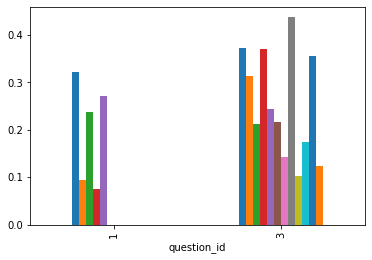

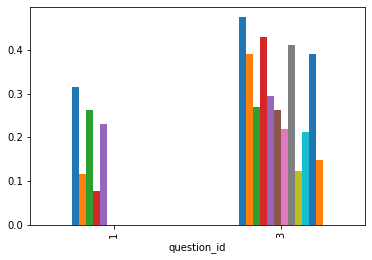

In [33]:
# 그래프를 주피터 화면에 띄우기 위한 주피터 명령어
%matplotlib inline

table.plot(kind = 'bar', legend = False)

table_purchased.plot(kind = 'bar', legend = False)